In [4]:
import seaborn as sns
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pathlib as path
from scipy import stats

In [5]:
#this is where all downladed data exists (after extracting the zip file)

#PATH_TO_DATA = path.Path(r'C:\Users\User\Desktop\visualpilot')
PATH_TO_DATA = path.Path.cwd().parent / 'data' / 'pilot_same_day' #this is relational, assuming that this file runs from the analysis folder. 

# total number of batches to enter into the anaylsis
total_batches = [1,2,3,4,5,6,7]

In [6]:

filename = 'one_line_per_participant_all_info_valid_subjects_only.csv'
all_valid_subjects = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'processed data{batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_valid_subjects = pd.concat([all_valid_subjects,file])

In [7]:
#loading all oneline per participant (both qualificed and non qualified)
filename = 'one_line_per_participant_all_info_all_subject.csv'
all_subjects = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'processed data{batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_subjects = pd.concat([all_subjects,file])

In [8]:
all_valid_subjects.shape

(54, 19)

In [9]:
all_subjects

,demo_arrow_correct,demo_arrow_rt,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_3_accuracy,testing_longest_response_strike,demo_demo_accuracy.1,demo_arrow_correct.1,encoding_arrow_accuracy.1,testing_longest_response_strike.1,not_too_slow,not_too_Fast,sufficient_test_acc,WorkerId
A3SSIUMI7ONK5W_2022-09-18_07h12.45.775.csv,0.0,NaN,0.500000,2.395550,3.3074,1.483700,1.633333,0.4,0.600000,1.201172,...,0.60,2.0,True,False,False,True,True,True,False,A3SSIUMI7ONK5W
A2NVX39CZ34V4E_2022-09-18_09h34.12.895.csv,0.0,NaN,0.333333,185.596350,278.3189,0.151250,1.127340,1.0,0.600000,0.863125,...,0.65,6.0,False,False,True,True,True,False,False,A2NVX39CZ34V4E
A28OD52SMLYQ16_2022-09-18_09h47.12.518.csv,1.0,0.3730,0.833333,3.287333,4.4740,3.050000,1.015600,1.0,0.700000,2.321117,...,0.55,5.0,True,True,True,True,True,True,True,A28OD52SMLYQ16
A344BXT88DM2ZH_2022-09-18_09h11.14.066.csv,0.0,2.3575,0.500000,2.584883,3.2033,1.966467,1.280650,0.6,0.650000,1.751567,...,0.75,5.0,True,False,False,True,True,True,True,A344BXT88DM2ZH
A2MIFJZZPOCI6_2022-09-18_07h49.50.603.csv,0.0,0.2098,0.500000,0.813833,0.3475,1.280167,1.799600,0.4,0.900000,5.812633,...,0.95,2.0,True,False,False,True,False,True,True,A2MIFJZZPOCI6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3QYA7EFCS7BA2_2022-10-19_09h04.54.524.csv,1.0,0.7878,1.000000,1.305217,NaN,1.305217,0.641820,1.0,0.833333,1.540307,...,0.75,6.0,True,True,True,True,True,True,True,A3QYA7EFCS7BA2
A3EWKKJTP2GY2L_2022-10-19_09h35.42.864.csv,1.0,2.6520,0.833333,3.458000,1.5740,3.834800,1.280400,1.0,0.700000,1.509583,...,0.70,4.0,True,True,True,True,True,True,True,A3EWKKJTP2GY2L
A2KLIBLDVDV144_2022-10-19_09h18.26.424.csv,1.0,0.8870,0.833333,2.137483,2.6671,2.031560,1.251675,0.8,0.800000,2.279028,...,0.70,7.0,True,True,True,True,True,True,True,A2KLIBLDVDV144
A3N3F3JSOX6R8N_2022-10-19_04h20.52.257.csv,1.0,0.6256,0.666667,1.591850,1.2708,1.752375,0.561260,1.0,0.633333,0.720570,...,0.75,5.0,True,True,True,True,True,False,True,A3N3F3JSOX6R8N


In [27]:
all_valid_subjects[['testing_Test_overall_accuracy','testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']]

,testing_Test_overall_accuracy,testing_layer_1_accuracy,testing_layer_2_accuracy,testing_layer_3_accuracy
A28OD52SMLYQ16_2022-09-18_09h47.12.518.csv,0.700000,0.85,0.700000,0.55
A3N5E6HZDBRFNC_2022-09-18_14h35.20.436.csv,0.650000,0.70,0.550000,0.70
A1NLJ1L4VCQYV2_2022-09-18_08h31.35.191.csv,0.816667,0.85,0.850000,0.75
AS08ODODBG8BX_2022-09-18_09h19.30.174.csv,0.716667,0.75,0.700000,0.70
AOOLS8280CL0Z_2022-09-18_10h26.55.173.csv,0.850000,0.90,0.900000,0.75
A289D98Z4GAZ28_2022-09-18_10h43.08.637.csv,0.833333,0.90,0.750000,0.85
A2LMSIDVE4E4IO_2022-09-18_09h13.43.452.csv,0.633333,0.65,0.700000,0.55
A2JLNOYPVW7W4V_2022-09-18_07h10.36.959.csv,0.766667,0.80,0.750000,0.75
A35SQDP3G7ZFEP_2022-09-18_09h09.49.234.csv,0.700000,0.80,0.600000,0.70
A2YC6PEMIRSOAA_2022-09-18_08h22.21.342.csv,0.800000,0.75,0.800000,0.85


c:\Users\d_abe\.conda\envs\my_env_v3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\d_abe\.conda\envs\my_env_v3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


Text(376.36363636363626, 0.5, 'RT')

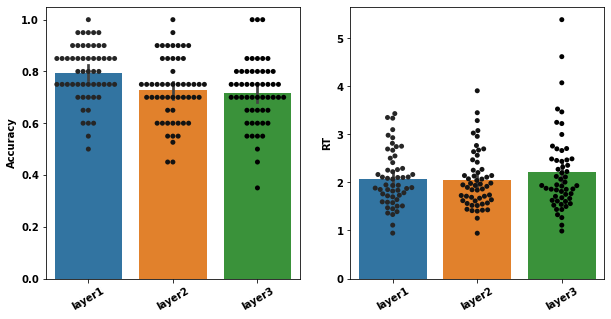

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0])
sns.swarmplot(data=all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')

sns.barplot(data=all_valid_subjects[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1])
sns.swarmplot(data=all_valid_subjects[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1],color='k')

axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].set_ylabel('RT')

### ANOVA 

In [11]:
temp = all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy','testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']]

df = pd.DataFrame({'patient': np.repeat(temp.index, 3),
                   'layer': np.tile([1, 2,3], temp.shape[0]),
                   'accuracy': temp[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']].to_numpy().ravel(),
                    'rt': temp[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']].to_numpy().ravel() })

# Conduct the repeated measures ANOVA
print(AnovaRM(data=df, depvar='accuracy',
              subject='patient', within=['layer']).fit())

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
layer 10.6511 2.0000 106.0000 0.0001



### CORRELATION 

In [12]:
curr_layer = df[df['layer'] == 3
               ]
curr_layer['accuracy'].corr(curr_layer['rt'])

-0.04368244498303533

In [13]:
all_subjects.columns

Index(['demo_arrow_correct', 'demo_arrow_rt', 'demo_demo_accuracy',
       'demo_RT_overall_mean', 'demo_RT_incorrect_mean',
       'demo_RT_correct_mean', 'encoding_arrow_mean_rt',
       'encoding_arrow_accuracy', 'testing_Test_overall_accuracy',
       'testing_RT_overall_mean', 'testing_RT_incorrect_mean',
       'testing_RT_correct_mean', 'testing_layer_1_rt',
       'testing_layer_1_accuracy', 'testing_layer_2_rt',
       'testing_layer_2_accuracy', 'testing_layer_3_rt',
       'testing_layer_3_accuracy', 'testing_longest_response_strike',
       'demo_demo_accuracy.1', 'demo_arrow_correct.1',
       'encoding_arrow_accuracy.1', 'testing_longest_response_strike.1',
       'not_too_slow', 'not_too_Fast', 'sufficient_test_acc', 'WorkerId'],
      dtype='object')

### Testing the criterions

In [14]:
criterions=['demo_demo_accuracy.1', 'demo_arrow_correct.1',
       'encoding_arrow_accuracy.1', 'testing_longest_response_strike.1',
       'not_too_slow', 'not_too_Fast']

depvar='testing_Test_overall_accuracy'
for curr_criterion in criterions:
    passed=all_subjects.loc[all_subjects[curr_criterion]]
    failed=all_subjects.loc[~all_subjects[curr_criterion]]
    t,p=stats.ttest_ind(passed[depvar].values,failed[depvar].values)
    print(f'{curr_criterion} TTEST results: t({len(passed),len(failed)}) = {t:.3f}, p = {p:.3f} passed mean: {np.mean(passed[depvar].values):.2f}, failed mean: {np.mean(failed[depvar].values):.2f}')


demo_demo_accuracy.1 TTEST results: t((148, 39)) = 5.096, p = 0.000 passed mean: 0.67, failed mean: 0.56
demo_arrow_correct.1 TTEST results: t((133, 54)) = 1.497, p = 0.136 passed mean: 0.65, failed mean: 0.62
encoding_arrow_accuracy.1 TTEST results: t((100, 87)) = 5.021, p = 0.000 passed mean: 0.68, failed mean: 0.60
testing_longest_response_strike.1 TTEST results: t((167, 20)) = 4.603, p = 0.000 passed mean: 0.66, failed mean: 0.53
not_too_slow TTEST results: t((172, 15)) = -0.651, p = 0.516 passed mean: 0.64, failed mean: 0.66
not_too_Fast TTEST results: t((146, 41)) = 7.089, p = 0.000 passed mean: 0.67, failed mean: 0.54


read all subjects data in long format - remove the invalid participants and write the code per image: 


In [15]:

#loading all oneline per participant (both qualificed and non qualified)
filename = 'all_subjects_test_df.csv'
all_subjects_long_format = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'processed data{batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_subjects_long_format = pd.concat([all_subjects_long_format,file])

#last: read the encoding so we get a list of all target images to make life easier:
encoding_df=pd.read_csv(PATH_PROCESED.parent / 'all_subjects_encoding_df.csv',index_col=False)
target_images_list=list(encoding_df['target_image'].unique())
target_images_list.remove('left.jpg')
target_images_list.remove('right.jpg')

only_valid_subjects_long_format=all_subjects_long_format.loc[all_subjects_long_format['subject'].apply(lambda x: x in  all_valid_subjects.index)]

In [16]:
#get a list of all distractor images: 
distractor_img_list=list(set(np.unique(all_subjects_long_format[['image1', 'image2']].values.flatten()))-set(target_images_list))
len(distractor_img_list)

206

In [17]:
#collect statistics on target images: 
accuracy_per_img=[]
apearance_per_img=[]
left_accuracies=[]
left_occurences=[]
right_accuracties=[]
right_occurences=[]

for target_img in target_images_list: 
    curr_img_occurences=only_valid_subjects_long_format.loc[(only_valid_subjects_long_format['image1']==target_img) | (only_valid_subjects_long_format['image2']==target_img)]
    accuracy_per_img.append(curr_img_occurences['test_test_response.corr'].sum()/curr_img_occurences['test_test_response.corr'].count())
    apearance_per_img.append(curr_img_occurences['test_test_response.corr'].count())
    left_success=curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[0][0]
    left_accuracies.append(left_success)
    left_occurences.append(curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[0][1])




    right_success=curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[1][0]
    right_accuracties.append(right_success)
    right_occurences.append(curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[1][1])

images_behavior_df=pd.DataFrame(data={'overall_accuracy':accuracy_per_img,'left_occurence':left_occurences,'accuracy_when_left':left_accuracies,'right_occurence':right_occurences,'accuracy_when_right':right_accuracties},index=target_images_list)


<AxesSubplot:>

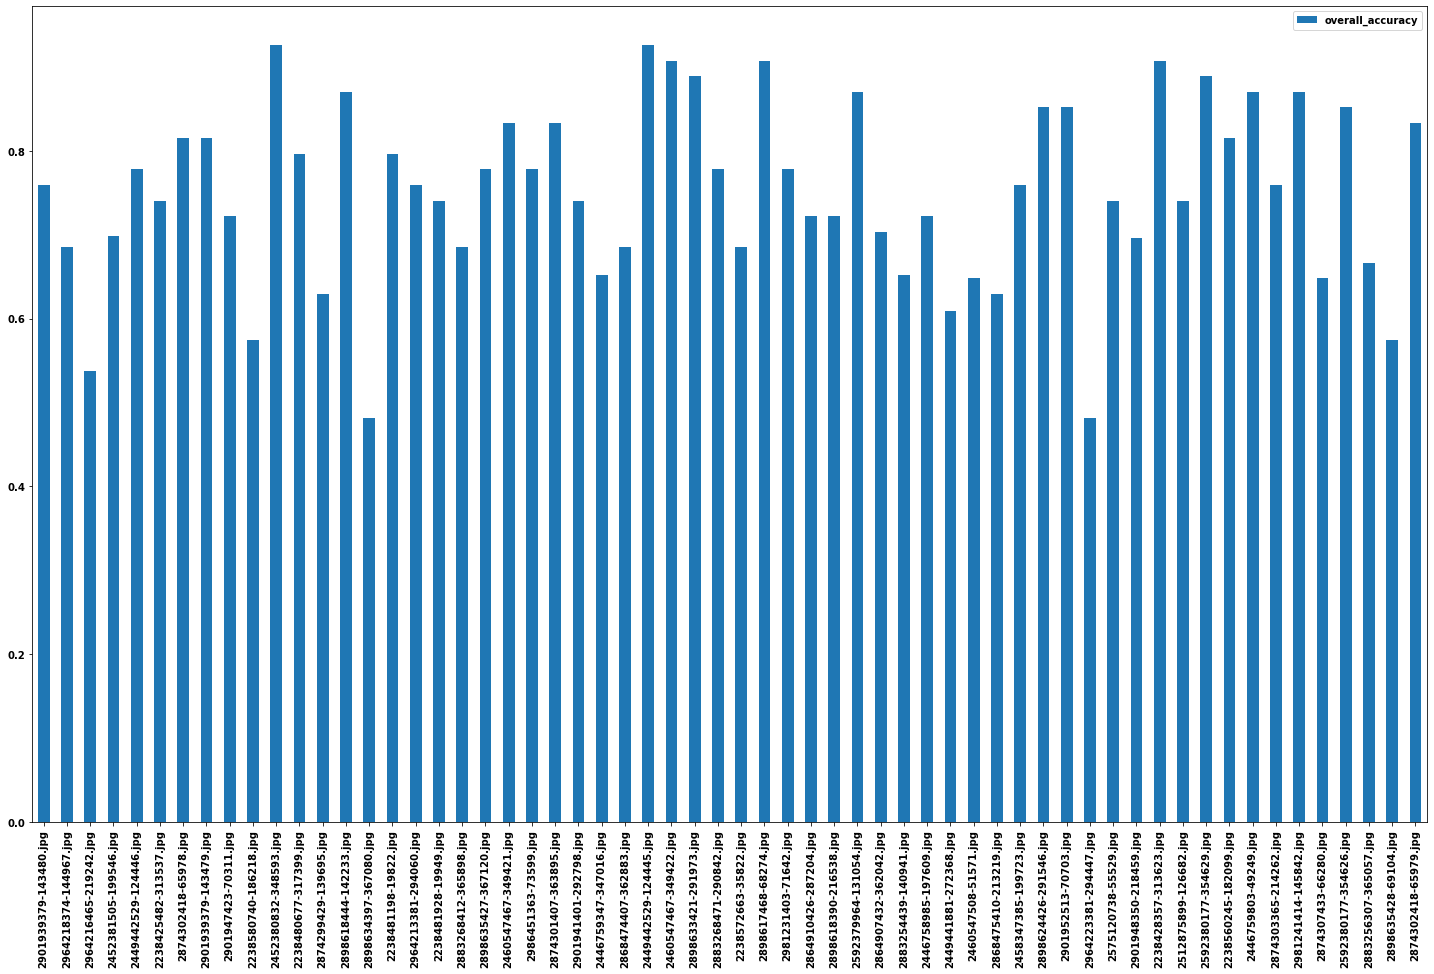

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
images_behavior_df.plot(kind='bar',y=['overall_accuracy'],ax=axes)


In [19]:
#collecft statistics on distractor images: 
accuracy_per_distractor_img=[]
counts_per_distractor_img=[]


for target_img in distractor_img_list: 
    curr_img_occurences=only_valid_subjects_long_format.loc[(only_valid_subjects_long_format['image1']==target_img) | (only_valid_subjects_long_format['image2']==target_img)]
    accuracy_per_distractor_img.append(curr_img_occurences['test_test_response.corr'].sum()/curr_img_occurences['test_test_response.corr'].count())
    counts_per_distractor_img.append(curr_img_occurences['test_test_response.corr'].count())

distractor_images_behavior_df=pd.DataFrame(data={'overall_accuracy':accuracy_per_distractor_img,'occurence':counts_per_distractor_img},index=distractor_img_list)


<AxesSubplot:>

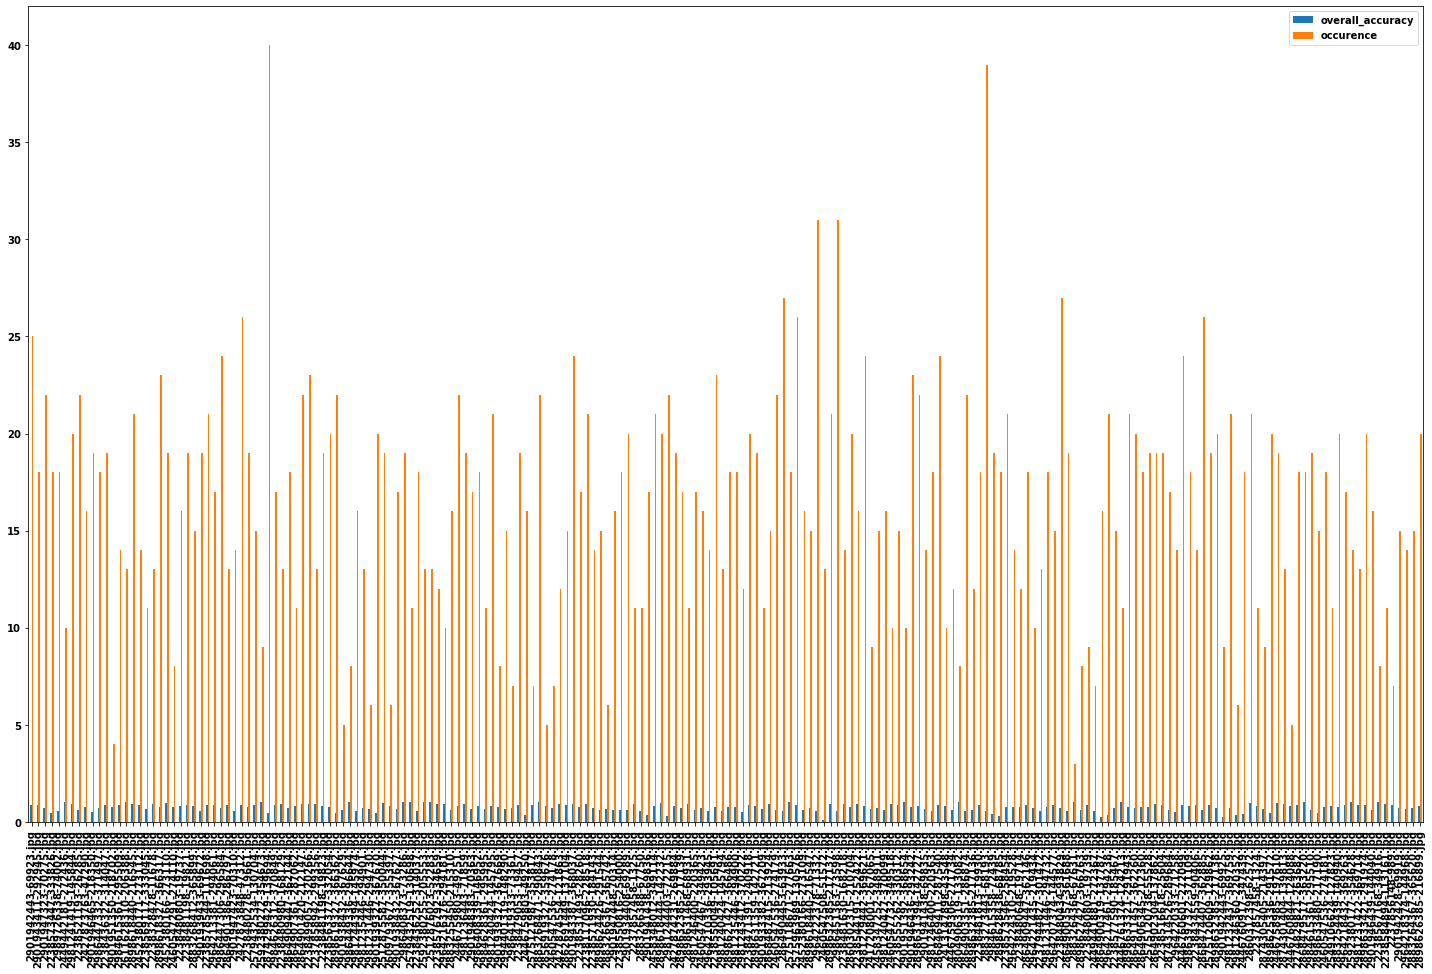

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
distractor_images_behavior_df.plot(kind='bar',y=['overall_accuracy','occurence'],ax=axes)
